* When making coffee, you usually have to wait for it to cool a bit before drinking.
* To minimize wait time, and if you're adding cold milk, should you add it immediately or wait for the coffee to cool a little then add milk at the last moment?
  * And if you wait, how long should you wait?

In [1]:
class Experiment:
  def __init__(self, T0=205, tau=5, Tenv=70):
    self.T = T0 # initial temperature of coffee
    self.Tenv = Tenv # ambient air temperature
    # Coefficient of heat transfer. Default value of 5 selected based on
    # experience with my mug that it takes roughly 20 minutes for freshly made
    # coffee to return basically to room temperature.
    self.tau = tau

  # Let coffee cool for t minutes
  def step(self, t):
    # https://en.wikipedia.org/wiki/Newton%27s_law_of_cooling#Nondimensionalisation
    self.T = self.Tenv + (self.T - self.Tenv) * np.exp(-t / self.tau)
    return self.T

  # What would the temperature be if we added milk?
  # r = how much milk to add, as a fraction of how much coffee there is
  def milk_check(self, r=.15, Tmilk=40):
    return (self.T * 1 + Tmilk * r) / (1 + r)

  # Add milk
  def add_milk(self, r=.15, Tmilk=40):
    self.T = self.milk_check(r, Tmilk)

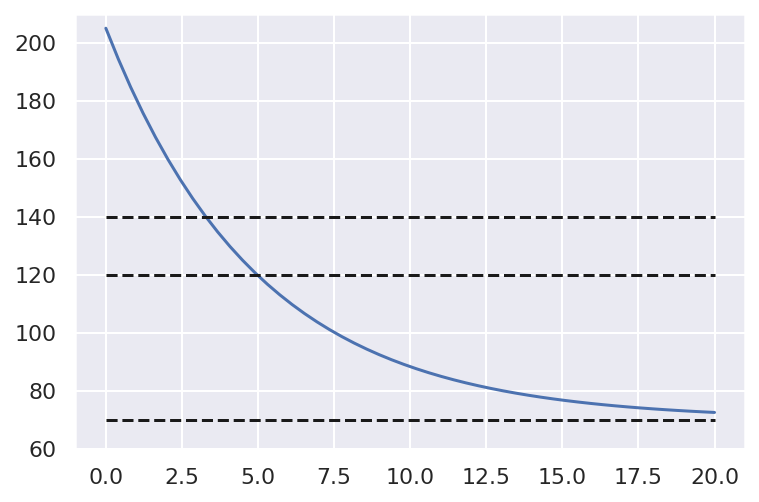

In [2]:
e = Experiment()
t = np.linspace(0, 20)
dt = t[1] - t[0]
y = [e.T] + [e.step(dt) for _ in t[:-1]]
plt.plot(t, y)
# https://www.reddit.com/r/Coffee/comments/iryqvc/ideal_drinking_temp/
plt.hlines([70, 120, 140], 0, 20, 'k', '--')
plt.ylim(60, 210);

In [3]:
e = Experiment()
print(e.milk_check())
e.step(1)
print(e.milk_check())
e.step(1)
print(e.milk_check())
e.step(.313)
print(e.milk_check())

183.47826086956522
162.19882753524135
144.77670105635767
140.0017385992211


In [4]:
# How long does it take for coffee to reach 140 degrees if we wait until the
# last moment and then add cold milk?
def find_t_delay(r, Tmilk):
  e = Experiment()
  t = 0
  dt = .001
  while t < 20:
    if e.milk_check(r, Tmilk) <= 140:
      break
    t += dt
    e.step(dt)
  return t

r = .1
Tmilk = 40
find_t_delay(r, Tmilk)

2.616999999999823

In [5]:
# How long does it take for coffee to reach 140 degrees if we immediately add
# cold milk?
def find_t_immediate(r, Tmilk):
  e = Experiment()
  e.add_milk(r, Tmilk)
  t = 0
  dt = .001
  while t < 20:
    if e.T <= 140:
      break
    t += dt
    e.step(dt)
  return t
find_t_immediate(r, Tmilk)

2.694999999999814

In [6]:
# How much longer does it take to reach 140 with a given amount of milk at a
# given temperature if we add it immediately rather than at the last moment?
def diff(r, Tmilk):
  return find_t_immediate(r, Tmilk) - find_t_delay(r, Tmilk)

The time varies depending on the temperature of the milk and how much you add, but it's never more than 14 seconds.

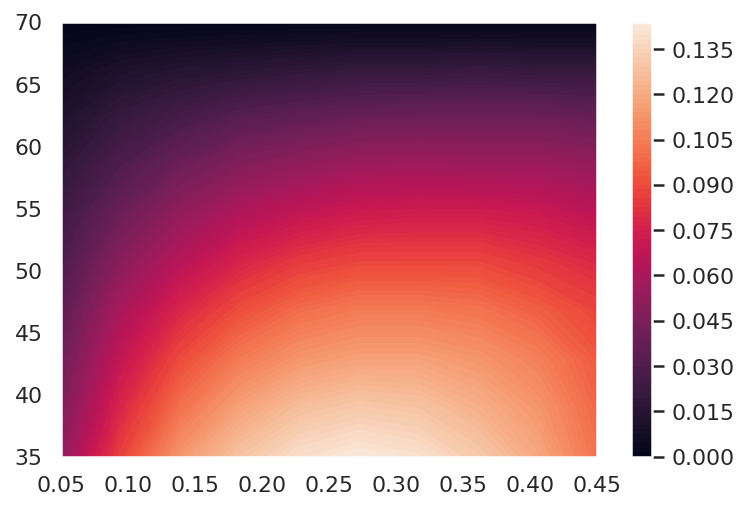

In [7]:
X = np.linspace(.05, .45, 10)
Y = np.linspace(35, 70, 10)
Z = np.zeros((Y.shape[0], X.shape[0]))
for i, x in enumerate(X):
  for j, y in enumerate(Y):
    Z[j, i] = diff(x, y)

plt.contourf(X, Y, Z, 100)
plt.colorbar();

2.272727272727273


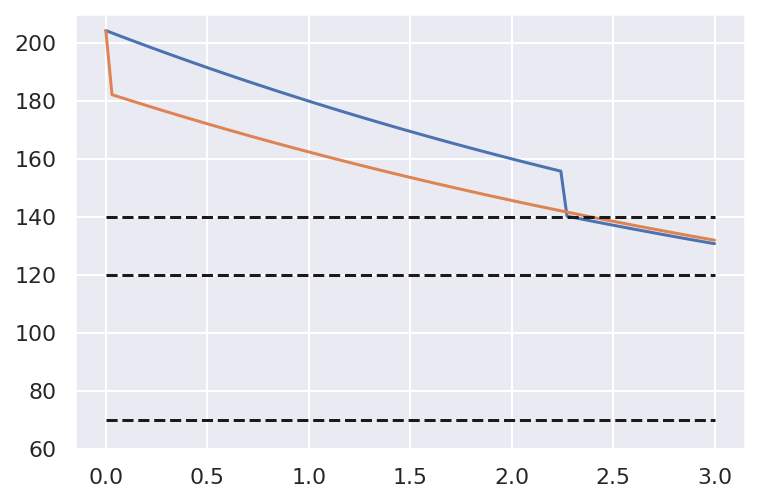

In [8]:
tmax = 3
t = np.linspace(0, tmax, 100)
dt = t[1] - t[0]

tmilk = 75
e = Experiment()
print(t[tmilk])
y0 = [e.step(dt) for _ in t[:tmilk]]
e.add_milk()
y1 = [e.step(dt) for _ in t[tmilk:]]
y = y0 + y1

e = Experiment()
y0 = [e.step(dt) for _ in t[:1]]
e.add_milk()
y1 = [e.step(dt) for _ in t[1:]]
y2 = y0 + y1

plt.plot(t, y)
plt.plot(t, y2)
plt.hlines([70, 120, 140], 0, tmax, 'k', '--')
plt.ylim(60, 210);